Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the data

In [ ]:
df = pd.read_csv('Irisdataset.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Label Encoding

In [ ]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
species_name= le.classes_
species_name

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


Splitting the data into training and testing

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=3)

In [ ]:

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(120, 4) (30, 4)
(120,) (30,)


Scaling the data - to normalize the data or all values are converted  into standard form

In [ ]:
sc= StandardScaler()  # then we get the accuracy high ,after standardizing the data
print(x_train[:2])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:2])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
14            5.8           4.0            1.2           0.2
24            4.8           3.4            1.9           0.2
[[-0.04717658  2.19102181 -1.46020619 -1.31097023]
 [-1.30521861  0.78501851 -1.06028014 -1.31097023]]


Tokenizing the training tuple i.e, converting row into binary 2-D matrix

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)  #tokenizing the training datasets using keras
#    num_classes=3 -['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
print(y_train[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


Building a Keras Model (Neural network model)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))   # input layer
model.add(Dense(units=32, activation='relu'))                                      # 1 hidden layer
model.add(Dropout(0.5))                                                            # 50% data is dropping i.e, prevents overfitting
model.add(Dense(units=3, activation='softmax'))                                    # output layer

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])  # we've morethan two categories
# ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Training the Model

In [ ]:
model.fit(x_train, y_train, epochs=100, verbose=2)  # epochs->passing the data 100 times,bcoz we've small amount of data it needs more training


Epoch 1/100
4/4 - 1s - loss: 1.1566 - accuracy: 0.3833 - 872ms/epoch - 218ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0510 - accuracy: 0.4333 - 15ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9387 - accuracy: 0.6167 - 12ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9377 - accuracy: 0.6083 - 14ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8736 - accuracy: 0.6500 - 13ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8365 - accuracy: 0.7083 - 14ms/epoch - 3ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8231 - accuracy: 0.6917 - 13ms/epoch - 3ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7728 - accuracy: 0.7250 - 14ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7375 - accuracy: 0.7417 - 13ms/epoch - 3ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7238 - accuracy: 0.7667 - 13ms/epoch - 3ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6510 - accuracy: 0.8250 - 12ms/epoch - 3ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6618 - accuracy: 0.7750 - 13ms/epoch - 3ms/step
Epoch 13/100
4/4 - 0s - loss: 0.5885 - accurac

we can see that accuracy is improved by passing the data many times above,i.e, which means our Neural network improves accuracy             

Now,to predict the testing data

In [ ]:
prediction = model.predict(x_test)
print(prediction[:5])

1/1 [==============================] - 0s 19ms/step
[[9.9991339e-01 6.4246931e-05 2.2289985e-05]
 [9.9987030e-01 9.8501099e-05 3.1377662e-05]
 [9.9948066e-01 4.0669323e-04 1.1257091e-04]
 [9.9951738e-01 3.9475091e-04 8.7839413e-05]
 [9.9991137e-01 7.4384661e-05 1.4148728e-05]]


In [ ]:
# checking the max prediction using "argmax" function using np which results ,indices of the max in every row

prediction = np.argmax(prediction, axis=-1)
print(prediction.ndim)
print(prediction.dtype)
print(prediction)            #  In every row 0th index is the maximum prediction value

1
int64
[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 1 1 1 1]


In [ ]:

print(y_test[:5])

47    0
3     0
31    0
25    0
15    0
Name: Species, dtype: int64


In [ ]:

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score=accuracy_score(y_test, prediction)
print(accuracy_score)

0.9666666666666667


In [ ]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


Text(50.72222222222221, 0.5, 'actual')

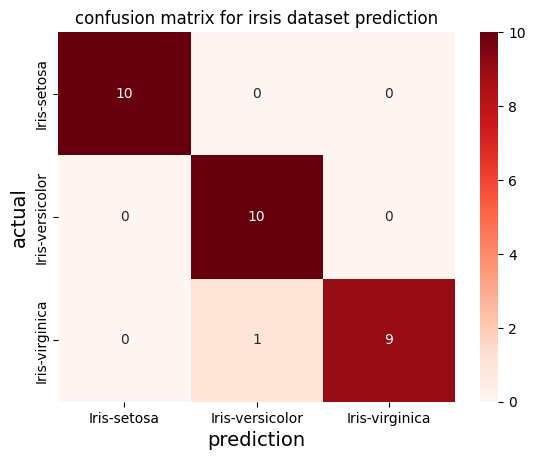

In [ ]:

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                 xticklabels=species_name, yticklabels=species_name)
# ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] -> species_name
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)

In [ ]:
 # from the heatmap we can predict that 10 times it predicts exact Iris-setosa
 #                 It predict 10 times as Iris-Versicolor .... but Iris-Versicolor is predicted as Iris-Virginica 1 time....




 # Thank you................